In [2]:

import numpy as np # linear algebra
import pandas as pd #data processing, csv file (e.g. pd.readcsv)
import seaborn as sns
import matplotlib.pyplot as plt


Loading the Dataset & EDA


In [3]:
data=pd.read_csv('/Users/macbookair/Documents/Python Projects/medical_insurance.csv')
data.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2772 entries, 0 to 2771
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       2772 non-null   int64  
 1   sex       2772 non-null   object 
 2   bmi       2772 non-null   float64
 3   children  2772 non-null   int64  
 4   smoker    2772 non-null   object 
 5   region    2772 non-null   object 
 6   charges   2772 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 151.7+ KB


,age,bmi,children,charges
count,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,30.701349,1.101732,13261.369959
std,14.081459,6.129449,1.214806,12151.768945
min,18.000000,15.960000,0.000000,1121.873900
25%,26.000000,26.220000,0.000000,4687.797000
50%,39.000000,30.447500,1.000000,9333.014350
75%,51.000000,34.770000,2.000000,16577.779500
max,64.000000,53.130000,5.000000,63770.428010


Distribution of Categorical Variables

In [5]:
categorical_features = ['sex', 'smoker', 'region']
for feature in categorical_features:
    print("Distribution of ", feature)
    print(data[feature].value_counts())
    print("\n")

Distribution of  sex
sex
male      1406
female    1366
Name: count, dtype: int64


Distribution of  smoker
smoker
no     2208
yes     564
Name: count, dtype: int64


Distribution of  region
region
southeast    766
southwest    684
northwest    664
northeast    658
Name: count, dtype: int64




Distribution of Charges


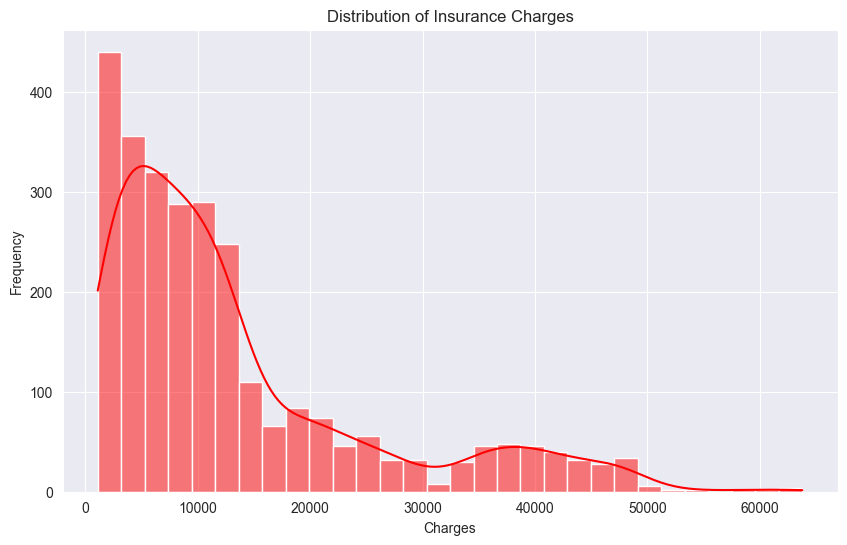

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(data['charges'], kde=True, bins=30, color='red')
plt.title('Distribution of Insurance Charges')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()


Boxplot to Visualize Charges by Region

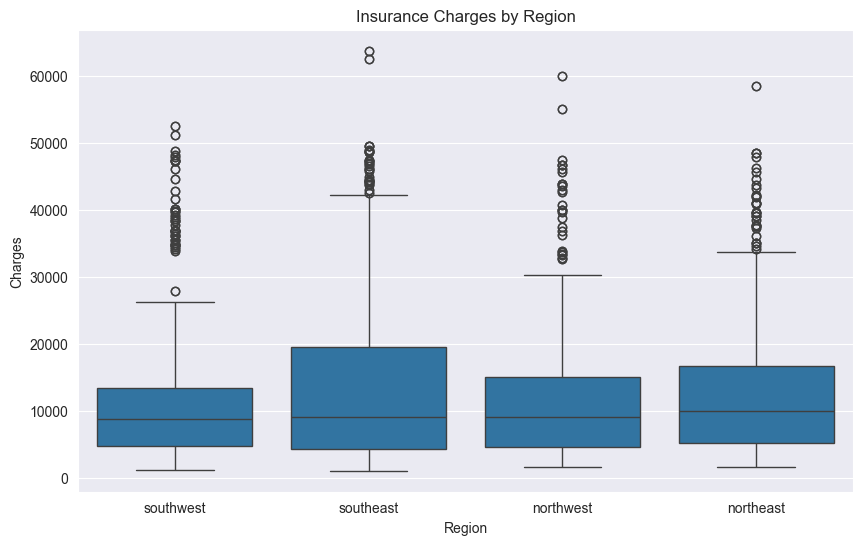

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='region', y='charges', data=data)
plt.title('Insurance Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

Boxplot to Visualize Charges by Smoking Status

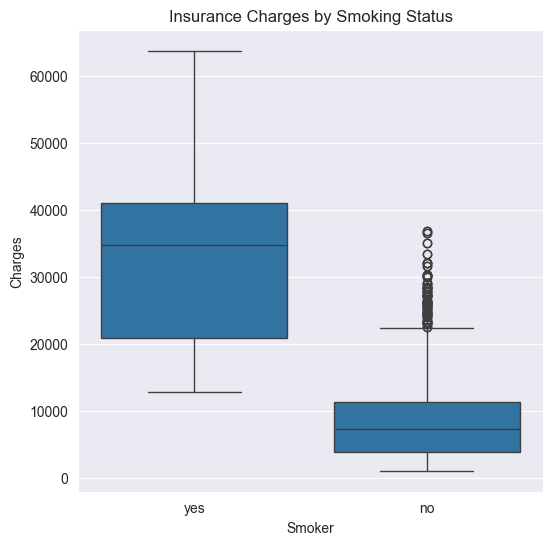

In [8]:

plt.figure(figsize=(6, 6))
sns.boxplot(x='smoker', y='charges', data=data)
plt.title('Insurance Charges by Smoking Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()


Encode Categorical Variables ("sex", "smoker", & "region") to Numerical Values (and make this change permanent)


In [9]:
#using the ML library to convert categorical variables into numerical form
from sklearn.preprocessing import LabelEncoder 

#make a copy of the original dataframe to preserve it
data_encoded = data.copy()

#initialize LabelEncoder
label_encoder = LabelEncoder()

#Encode 'sex', 'smoker', & 'region' columns
data_encoded['sex'] = label_encoder.fit_transform(data['sex'])
data_encoded['smoker'] = label_encoder.fit_transform(data['smoker'])
data_encoded['region'] = label_encoder.fit_transform(data['region'])

#display the first few rows of the encoded dataframe
print("Encoded dataframe:")
print(data_encoded.head())
print("\n")
# now the changes are permanent in the 'data_encoded' dataframe


Encoded dataframe:
   age  sex     bmi  children  smoker  region      charges
0   19    0  27.900         0       1       3  16884.92400
1   18    1  33.770         1       0       2   1725.55230
2   28    1  33.000         3       0       2   4449.46200
3   33    1  22.705         0       0       1  21984.47061
4   32    1  28.880         0       0       1   3866.85520




In [10]:
#to make the changes permanent in the original dataframe 'data' do the following:
data[['sex','smoker','region']] = data_encoded[['sex', 'smoker', 'region']]

Correlation Matrix

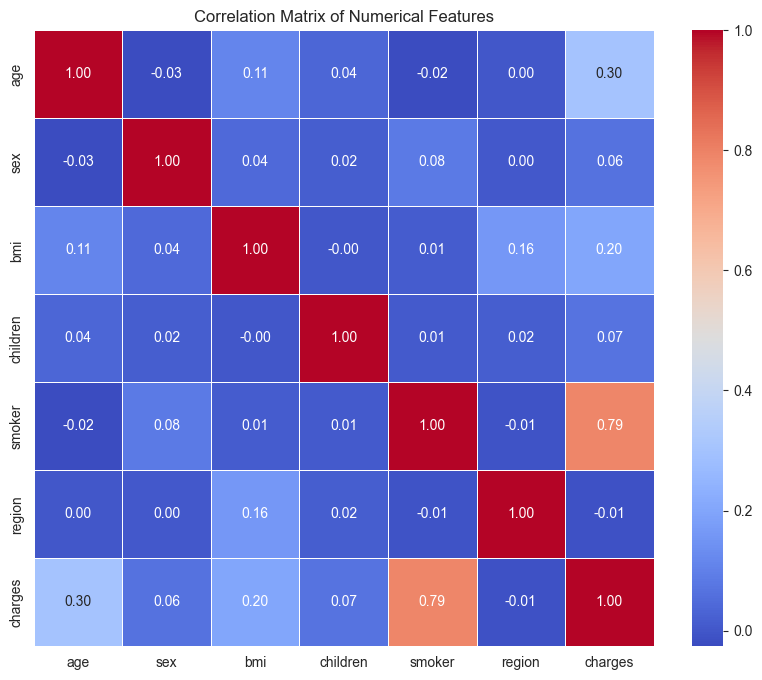

In [11]:

#compute the correlation matrix
correlation_matrix = data.corr()

#plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Summary of Statistics of the Data with Encoded Variables

In [12]:

data.describe()

,age,sex,bmi,children,smoker,region,charges
count,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000,2772.000000
mean,39.109668,0.507215,30.701349,1.101732,0.203463,1.532468,13261.369959
std,14.081459,0.500038,6.129449,1.214806,0.402647,1.103467,12151.768945
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,26.000000,0.000000,26.220000,0.000000,0.000000,1.000000,4687.797000
50%,39.000000,1.000000,30.447500,1.000000,0.000000,2.000000,9333.014350
75%,51.000000,1.000000,34.770000,2.000000,0.000000,2.000000,16577.779500
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


Building a Linear Regression Model to Create Predictive Models 


In [13]:
#linear regression assumes there is a linear relationship between the dependent variable and one or more independent variables 
#sensitive to outliers but simple to understand and implement with easy-to interpret results

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [14]:
#Separate features (X) and target variable (Y)
X = data.drop('charges', axis=1)
y = data['charges']

#Split the dataset into Training and Testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
regressor = LinearRegression()

#Initialize and train the Linear Regression model 
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Make predictions on the Test set (20%)
lr_predictions = lr_model.predict(X_test) #these will be compared to the y_test values 

#Compute the Mean Squared Error (MSE) of the Linear Regression Model 
lr_mse = mean_squared_error(y_test, lr_predictions) #using the actual Charges vs the predicted Charges
print("Mean Squared Error (Linear Regression):", lr_mse)


Mean Squared Error (Linear Regression): 39922479.35435013


Building a Decision Tree Regressor to Create Predictive Models

Mean Squared Error (Decision Tree): 8658302.858462535


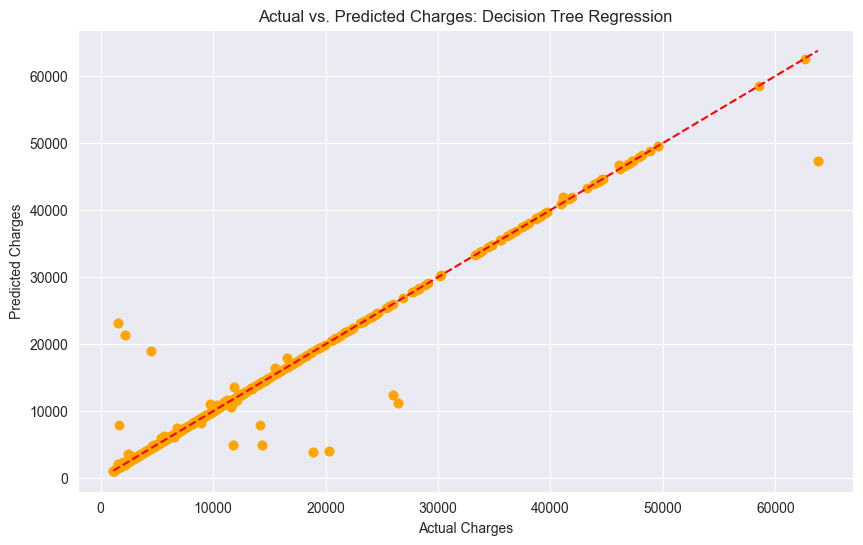

In [15]:
#Algorithm: creates a multitude of decision trees during training and outputs the mean prediction of the individual trees
#less interpretable

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Initialize and Train the Decision Tree Regressor model
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)

#Make predictions on the Test set
dt_predictions = dt_model.predict(X_test) #these will be compared to y_test values 

#Compute the Mean Square Error (MSE) of the Decision Tree Regressor model
dt_mse = mean_squared_error(y_test, dt_predictions)
print("Mean Squared Error (Decision Tree):", dt_mse)

#Plot Actual vs Predicted Charges using Decision Tree Regressor
plt.figure(figsize=(10, 6))
plt.scatter(y_test, dt_predictions, color='orange')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges: Decision Tree Regression')
plt.show()


Building a Support Vector Regression (SVR) to Create Predictive Models

How SVR works:
Analogy:
Imagine you are trying to draw the best straight line through a bunch of points on a graph. You want this line to be as close as possible to all the points, but you also want to keep a little buffer space (called the margin) around it to make it more reliable for future predictions. This buffer space helps the line not to be too sensitive to any single point.

Main pros 
1. Finding the Best Line: SVR tries to find the line (or hyperplane in higher dimensions) that best fits the data points. This is called the "regression line".
2. Margins: Instead of just fitting the line to the data points, SVR creates a margin around the line. Points within this margin are considered as correctly predicted.
3. Support Vectors: The points that lie exactly on the edge of the margin are called support vectors. These points are crucial because they help to define the position and orientation of the line.
4. Minimizing Error: The goal of SVR is to make the margin as wide as possible while ensuring that most data points are within the margin. This balance helps in reducing errors and avoiding overfitting (where the model fits too closely to the training data and performs poorly on new data).

Steps of SVR:
1. Choose a linear function: Start with a linear function that you think will fit the data.
2. Create Margins: Define a margin of tolerance (epsilon) around the function.
3. Optimization: Adjust the function to maximize the margin and minimize prediction errors outside the margin.
4. Support Vectors: Identify the critical data points (support vectors) that lie on the margin.

In essence, SVR works by not only fitting the best possible line to the data but also ensuring there's a safety zone around it, making the model robust and better at predicting new data points.

Mean Squared Error (SVR): 163569917.51454753


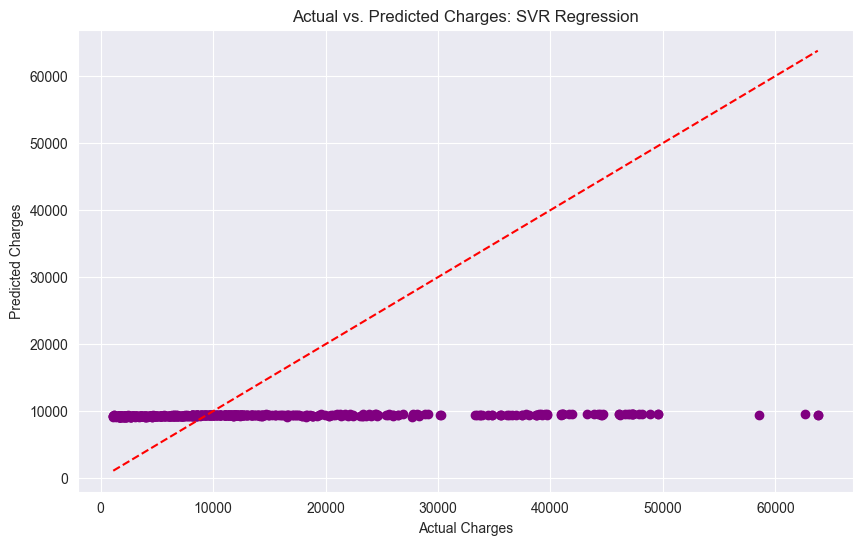

In [16]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

#Initialize SVR model with a pipeline including standard scaling
svr_model = make_pipeline(StandardScaler(), SVR())

#Train the SVR model 
svr_model.fit(X_train, y_train)

#Make predictions on the test set 
svr_predictions = svr_model.predict(X_test)

#Compute the Mean Squared Error (MSE) on the SVR model 
svr_mse = mean_squared_error(y_test, svr_predictions)
print("Mean Squared Error (SVR):", svr_mse)

#Plot Actual vs. Predicted Charges using SVR
plt.figure(figsize=(10, 6))
plt.scatter(y_test, svr_predictions, color='purple')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle ='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges: SVR Regression')
plt.show()



Gradient Boosting Regressor

Overview of GBR
GBR is a powerful machine learning algorithm used for regression tasks. It builds a model in a stage-wise fashion by combining the predictions of multiple weak models (typically Decision trees) to create a strong predictive model. 
Steps: 
1. Initialize: Start with an initial prediction (e.g. the mean of the target values)
2. Iterate:
* Compute the residual errors based on the current predictions 
* Fit a new decision tree to the residual errors
* Update the model by adding the new tree, scaled by the learning rate 
3. Combine: The final prediction is the sum of the initial prediction and the contributions from all the trees.  

Mean Squared Error (Gradient Boosting): 18843332.950803585


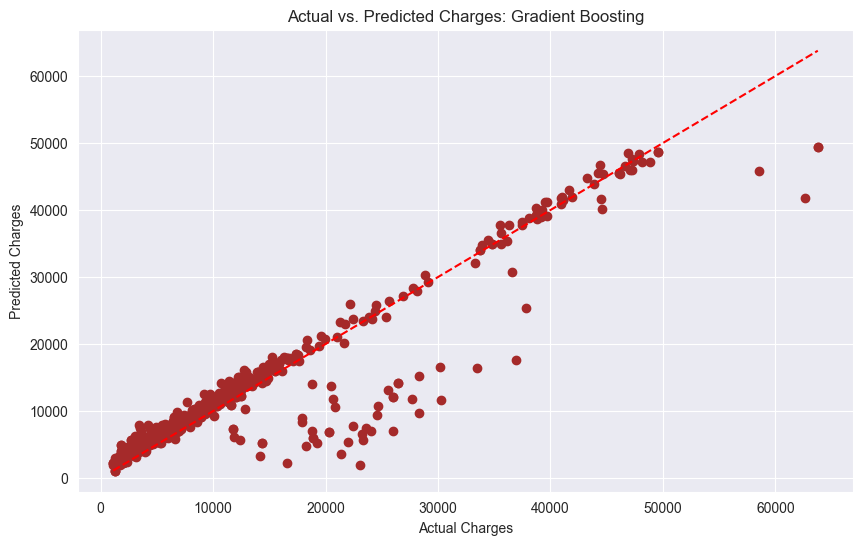

In [19]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Initialize and train the Gradient Boosting Regressor Model
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)

#Make predictions on the test set 
gb_predictions = gb_model.predict(X_test)

#Compute the MSE of the GBR model 
gb_mse = mean_squared_error(y_test, gb_predictions)
print("Mean Squared Error (Gradient Boosting):", gb_mse)

#Plot Actual vs. Predicted Charges for the GBR model 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, gb_predictions, color='brown')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],color = 'red', linestyle = '--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges: Gradient Boosting')
plt.show()


K-Neighbour Regressor

This is a simple and intuitive machine learning algorithm used for regression tasks. It is non-parametric,i.e it does not assume a fixed form for the regression function, which makes it versatile for various types of data patterns. 
It is based on the K-Nearest Neighbours (KNN) algorithm, which makes predictions based on the average of the target value of the K nearest data points in the feature space. 
Basic steps: 
1. Determine Neighbours 
*For a new data point, calculate the distance to all points in the training set and identify the K closest points.
2. Predict
* Average the target values of these K closest points to make the prediction. 


Mean Squared Error (KNN): 91389788.20287144


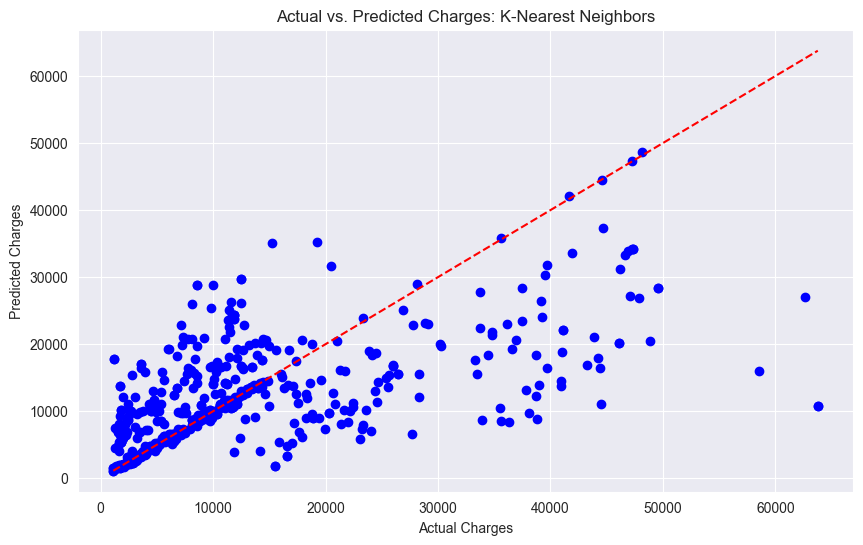

In [20]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

#Initialize and train the K-nearest neighbours regressor model 
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

#Make predictions on the test set 
knn_predictions = knn_model.predict(X_test)

#Compute the MSE of the K-Nearest Neighbours Regressor Model 
knn_mse = mean_squared_error(y_test, knn_predictions)
print("Mean Squared Error (KNN):", knn_mse)

#Plot Actual vs. Predicted Charges for K-Nearest Neighbours Regressor 
plt.figure(figsize=(10, 6))
plt.scatter(y_test, knn_predictions, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],color = 'red', linestyle = '--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges: K-Nearest Neighbors')
plt.show()